# Convolution Neural Network

Filter

filter (also called a kernel) is a small matrix used to detect specific features from the input image, such as edges, textures, or patterns. The filter slides across the image, performing a convolution operation, where it multiplies the overlapping image pixels by the filter’s weights and sums them up.

Padding 
padding refers to the process of adding extra pixels around the input image to control the spatial dimensions of the output. Padding is used to preserve the size of the input during convolution or to avoid reducing the dimensions too quickly.

Pooling 
pooling is a downsampling operation that reduces the spatial dimensions of the feature maps. It is applied after convolution layers to make the representation smaller and more manageable, helping reduce computational cost and preventing overfitting.

Flatten 
flattening is the process of converting a multi-dimensional tensor (like a feature map) into a one-dimensional vector. This is typically done before feeding the output from convolutional layers into fully connected layers.

BatchNormalization
BatchNormalization is a technique used in CNNs and other neural networks to stabilize and speed up training. It normalizes the inputs to each layer so that they have a mean of 0 and a standard deviation of 1, improving learning efficiency

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'
%matplotlib inline


In [4]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 139s 1us/step


In [5]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

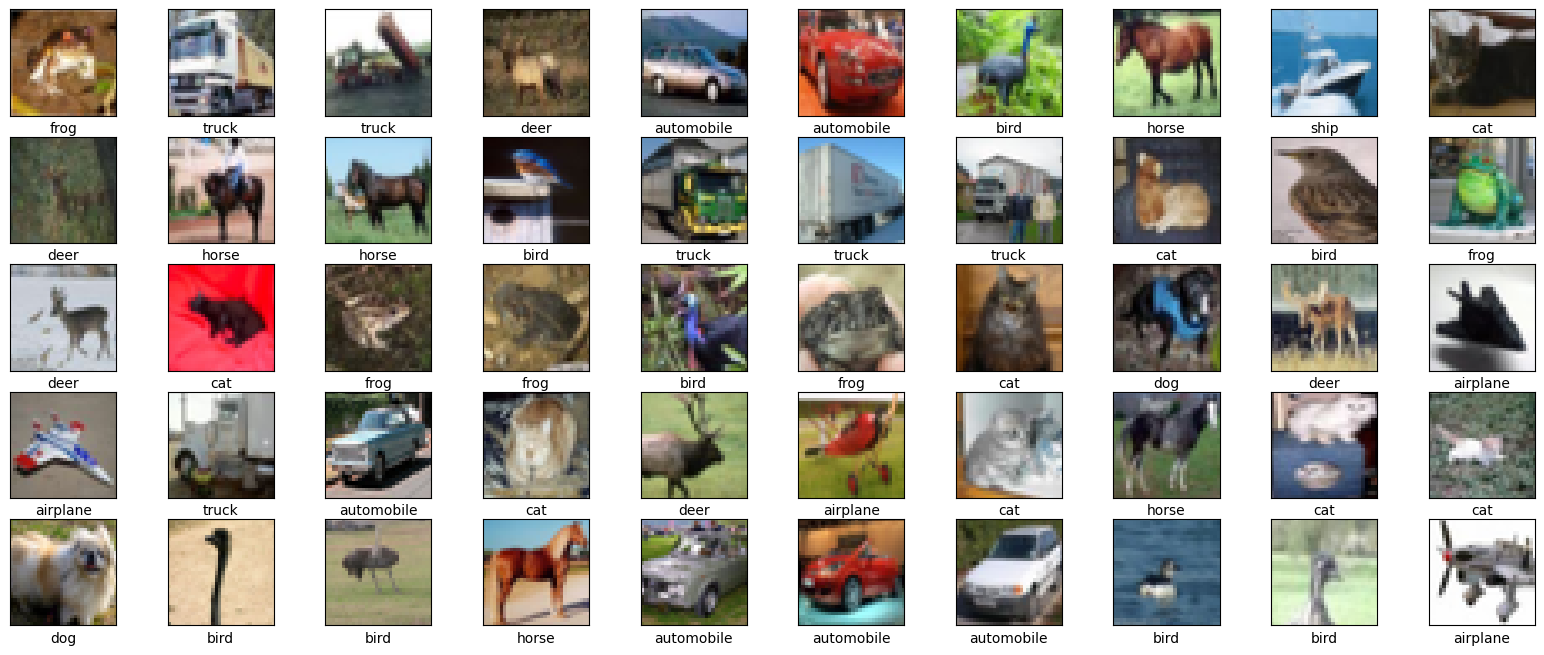

In [7]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [8]:
x_train=x_train/255
x_test=x_test/255

In [29]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32,32,3)),
    
    ## hidden layers
    layers.Conv2D(32,3, padding='valid', activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64,3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10)
])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow import keras
from tensorflow.keras import layers

def my_model():
    inputs = keras.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, 3)(inputs)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 5, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Conv2D(128, (3, 3))(x)
    x = layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)  # Added activation function
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model = my_model()


In [34]:

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0003), 
    loss=keras.losses.sparse_categorical_crossentropy,  # Remove from_logits here
    metrics=['accuracy']
)


In [35]:
h = model.fit(x=x_train, y=y_train, epochs=10, verbose=2, batch_size=64)

Epoch 1/10
782/782 - 102s - 131ms/step - accuracy: 0.5435 - loss: 1.2978
Epoch 2/10
782/782 - 97s - 124ms/step - accuracy: 0.6926 - loss: 0.8825
Epoch 3/10
782/782 - 101s - 130ms/step - accuracy: 0.7441 - loss: 0.7289
Epoch 4/10
782/782 - 100s - 128ms/step - accuracy: 0.7832 - loss: 0.6171
Epoch 5/10
782/782 - 98s - 126ms/step - accuracy: 0.8160 - loss: 0.5257
Epoch 6/10
782/782 - 101s - 129ms/step - accuracy: 0.8429 - loss: 0.4514
Epoch 7/10
782/782 - 110s - 141ms/step - accuracy: 0.8688 - loss: 0.3776
Epoch 8/10
782/782 - 100s - 128ms/step - accuracy: 0.8929 - loss: 0.3164
Epoch 9/10
782/782 - 97s - 124ms/step - accuracy: 0.9136 - loss: 0.2573
Epoch 10/10
782/782 - 98s - 126ms/step - accuracy: 0.9325 - loss: 0.2048


In [37]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7126 - loss: 1.0090

Test Accuracy: 0.7092000246047974

Test Loss: 1.0248316526412964


In [38]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [39]:
predictions[0]

array([1.47733208e-05, 4.87855118e-07, 1.58533055e-06, 9.91589487e-01,
       2.65238828e-06, 6.86068274e-03, 1.41410215e-03, 9.58818358e-09,
       1.15940595e-04, 3.00799144e-07], dtype=float32)

In [40]:
np.argmax(predictions[0])



3